In [83]:
import pandas as pd
import yfinance as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import platform
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings('ignore')

# for korean language
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

ticker = 'AAPL'
df_limit = 1500

dataVoo = pd.DataFrame(fdr.DataReader(ticker, start='2000-01-01', end='2023-03-01'))

different = dataVoo.index[-1] - dataVoo.index[0]
invstDays = different.days / 250

# CAGR: Compound Annual Growth Rate
returnCagr = (dataVoo.iloc[-1, 0] / dataVoo.iloc[0, 0]) ** (1 / invstDays) - 1
print(returnCagr * 100)

# HPR : Holding Period Return
print((dataVoo.iloc[-1, 0] / dataVoo.iloc[0, 0] - 1) * 100)
print(dataVoo.iloc[-1, 0])
print(dataVoo.iloc[0, 0])

16.12265686701044
15604.027727940675
147.050003
0.936384


          category
category          
보합              16
상승            2983
하락            2827


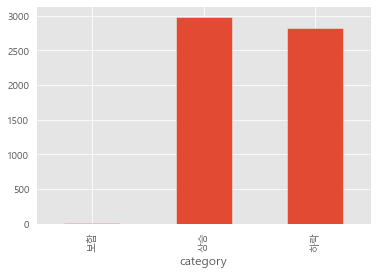

In [84]:
dataRefining = pd.DataFrame(dataVoo['Close'])

upward = dataVoo['Open'] < dataVoo['Close']
downward = dataVoo['Open'] > dataVoo['Close']
stationary = dataVoo['Open'] == dataVoo['Close']

dataRefining.loc[upward, 'category'] = '상승'
dataRefining.loc[downward, 'category'] = '하락'
dataRefining.loc[stationary, 'category'] = '보합'

how = {"category": len}
print(dataRefining.groupby('category').agg(how))

dataRefining.groupby('category').agg(how).plot.bar(legend=False)
plt.show()

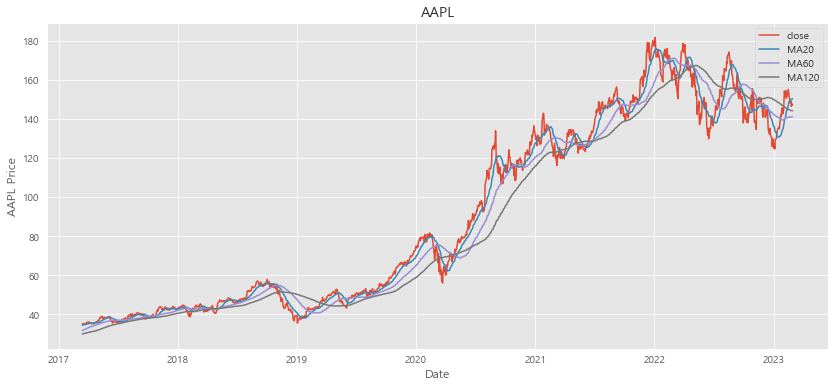

In [85]:
dataVoo["MA20"] = dataVoo['Close'].rolling(window=20).mean()
dataVoo["MA60"] = dataVoo['Close'].rolling(window=60).mean()
dataVoo["MA120"] = dataVoo['Close'].rolling(window=120).mean()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(dataVoo['Close'][-df_limit:], label="close")
ax.plot(dataVoo['MA20'][-df_limit:], label="MA20")
ax.plot(dataVoo['MA60'][-df_limit:], label="MA60")
ax.plot(dataVoo['MA120'][-df_limit:], label="MA120")

ax.set_xlabel("Date")
ax.set_ylabel(f'{ticker} Price')
ax.set_title(f'{ticker}')
ax.legend(loc="best")
plt.grid(True, axis='y')
plt.show()

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

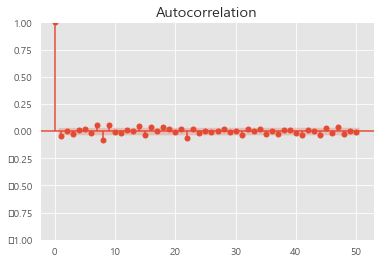

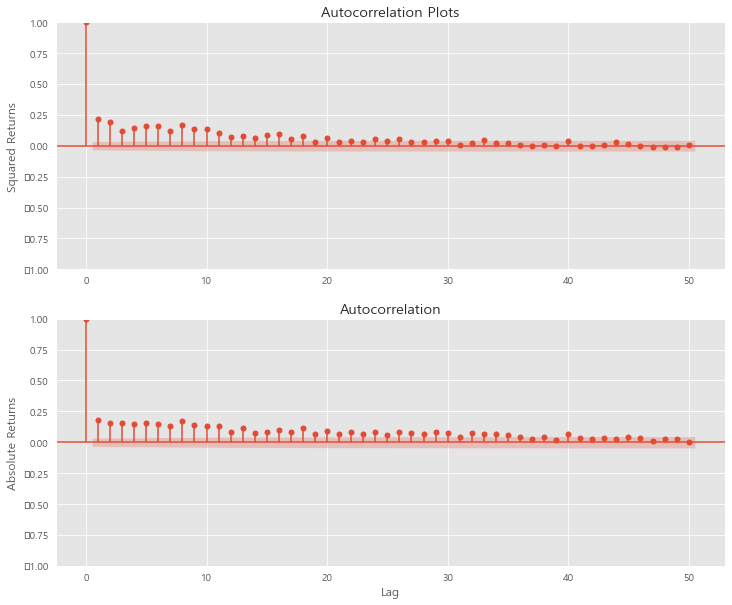

In [86]:
df = fdr.DataReader(ticker, start='2010-01-01', end='2023-03-31')

df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how='any')

# numpy.linspace : return evenly spaced parameter numbers for statistics such as Histogram
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

# Autocorrelation of df.log_rtn chk
acf = smt.graphics.plot_acf(df.log_rtn, lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL, ax=ax[0])
ax[0].set(title='Autocorrelation Plots', ylabel='Squared Returns')

smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL, ax=ax[1])
ax[1].set(ylabel='Absolute Returns', xlabel='Lag')

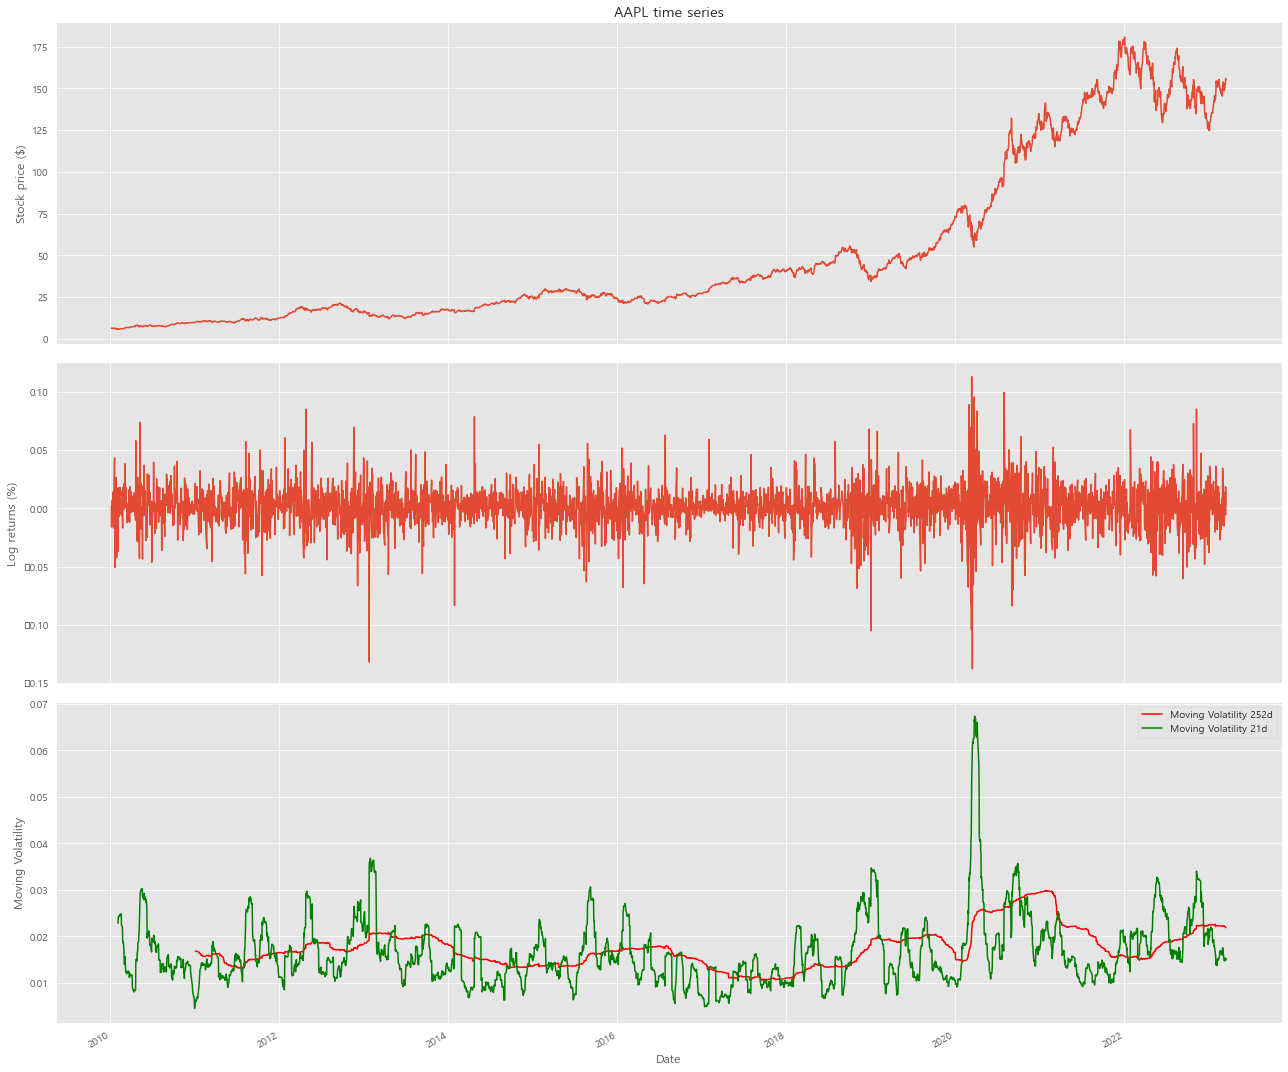

In [87]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

fig, ax = plt.subplots(3, 1, figsize=(18, 15), sharex=True)

df.adj_close.plot(ax=ax[0])
ax[0].set(title=f'{ticker} time series', ylabel='Stock price ($)')

df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')

df.moving_std_252.plot(ax=ax[2], color='r', label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g', label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility', xlabel='Date')
ax[2].legend()

plt.tight_layout()
plt.show()
# the correlation between stock price and volatility of the asset is negative
# (= the volatility increased while the stock price was decreasing) check the line 66.

#print(df.moving_std_252.tail())
#print(df.moving_std_21.tail())

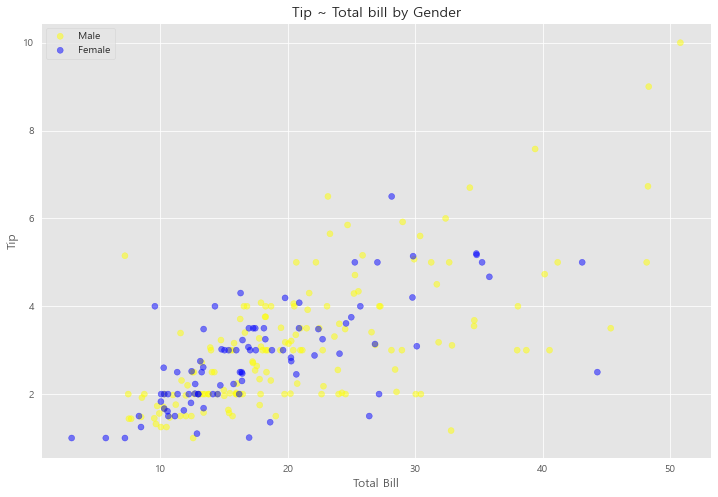

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
x = tips['total_bill']
y = tips['tip']

tips['sex_color'] = tips['sex'].map({"Female": "#0000FF", "Male": "#FFFF00"})

fig, ax = plt.subplots(figsize=(12, 8))
for label, data in tips.groupby('sex'):
    ax.scatter(data['total_bill'], data['tip'], label=label, color=data['sex_color'], alpha=0.5)
    ax.set_xlabel('Total Bill')
    ax.set_ylabel('Tip')
    ax.set_title('Tip ~ Total bill by Gender')

plt.legend()
plt.show()

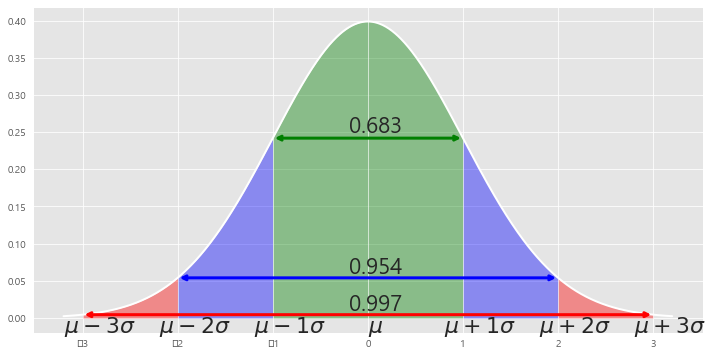

In [89]:
import numpy as np
import scipy

fig = plt.figure(figsize=(12, 6))
x = np.linspace(-3.2, 3.2, 1000)
iq = scipy.stats.norm(0, 1)  # mean:0, std:1 normal distribution function(probability density function)

plt.plot(x, iq.pdf(x), 'white', lw=2)

plt.text(-3.2, -0.02, "$\mu - 3\sigma$", size=22)
plt.text(-2.2, -0.02, "$\mu - 2\sigma$", size=22)
plt.text(-1.2, -0.02, '$\mu - 1\sigma$', size=22)
plt.text(0, -0.02, '$\mu$', size=22)
plt.text(0.8, -0.02, '$\mu + 1\sigma$', size=22)
plt.text(1.8, -0.02, '$\mu + 2\sigma$', size=22)
plt.text(2.8, -0.02, '$\mu + 3\sigma$', size=22)

plt.text(-0.2, 0.25, round(scipy.stats.norm(0, 1).cdf(1) - scipy.stats.norm(0, 1).cdf(-1), 3), size=22)
plt.text(-0.2, 0.06, round(scipy.stats.norm(0, 1).cdf(2) - scipy.stats.norm(0, 1).cdf(-2), 3), size=22)
plt.text(-0.2, 0.01, round(scipy.stats.norm(0, 1).cdf(3) - scipy.stats.norm(0, 1).cdf(-3), 3), size=22)

plt.annotate("", xy=(-1, scipy.stats.norm(0, 1).pdf(-1)), xytext=(1, scipy.stats.norm(0, 1).pdf(1)),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color="green", lw=3))

plt.annotate("", xy=(-2, scipy.stats.norm(0, 1).pdf(-2)), xytext=(2, scipy.stats.norm(0, 1).pdf(2)),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color="blue", lw=3))

plt.annotate("", xy=(-3, scipy.stats.norm(0, 1).pdf(-3)), xytext=(3, scipy.stats.norm(0, 1).pdf(3)),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3", color="red", lw=3))

colors = ['red', 'blue', 'green']

mean, std = 0, 1
for i, color in zip(range(-3, 3), colors + list(reversed(colors))):
    low = mean + i * std
    high = mean + (i + 1) * std
    px = x[np.logical_and(x >= low, x <= high)]
    plt.fill_between(px, iq.pdf(px), color=color, alpha=0.4, linewidth=0)

# plotly usage(not visible on Github)

In [91]:
import plotly.graph_objects as go
import pandas as pd

np.random.seed(10)

N = 150
mu, sigma = 0, 1
array_normal = np.random.normal(mu, sigma, N)
df_normal = pd.DataFrame(array_normal).rename(columns={0: 'Normal distribution'})
bins = [-3, -2, -1, 0, 1, 2, 3]

df_freq_table = df_normal.apply(lambda x: pd.cut(x, bins=bins).value_counts()).add_prefix('freq_')

counts, bins = np.histogram(df_normal['Normal distribution'], bins=bins)

fig = go.Figure(go.Bar(x=bins, y=counts))
fig.update_traces(textposition='outside', textfont_size=12, marker_color='blue', marker_line_color='white',
                  marker_line_width=2, opacity=0.7)
fig.update_layout(title_text='Histogram of normal distribution', title_font_size=15, bargap=0)

fig.update_xaxes(title_text='Normal distribution values')
fig.update_yaxes(title_text='Freq(cnt)')
fig.show()

In [92]:
import plotly.figure_factory as ff

#  show_rug = False: data location disable / True enable data location
fig = ff.create_distplot([array_normal], ['Normal Distribution'], show_rug=True)

fig.update_traces(marker_color='blue', marker_line_color='white', marker_line_width=2, opacity=0.7)
fig.update_layout(title_text='Histogram & density graph', title_font_size=15)
fig.update_xaxes(title_text='Normal distribution values')
fig.update_yaxes(title_text='Density')

fig.show()

In [93]:
mu1, sigma1 = 0, 1
mu2, sigma2 = 10, 5
normal_1 = np.random.normal(mu1, sigma1, N)
normal_2 = np.random.normal(mu2, sigma2, N)

fig = ff.create_distplot([normal_1, normal_2],
                         ['Normal distribution(0, 1)', 'Normal distribution(10, 5)'], show_rug=True)
fig.update_layout(title_text ='2 Normal distributions that have different Mean & Variance', title_font_size=15)
fig.show()